### Project 4 Modelling: OLS, Poisson regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from patsy import dmatrices
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from numpy import arange
import calendar
from dateutil.relativedelta import relativedelta

In [2]:
google = pd.read_csv('../../assets/complete_google_trends.csv')

In [3]:
google.head()

,Unnamed: 0,date,year,month,week,dengue_search,dengue_fever_search,dengue_symptoms_search,rashes_search,vomiting_search,eye_pain_search,joint_pain_search,fever_search,wolbachia_search,headache_search,nausea_search,fogging_search,insect_repellent_search,mosquito_search
0,0,2014-06-01,2014,1,1,44,61,18,67,43,30,27,73,0,22,9,0,1,5
1,1,2014-13-01,2014,1,2,38,55,14,73,38,0,26,66,2,25,11,0,3,5
2,2,2014-20-01,2014,1,3,31,46,13,60,52,12,13,80,0,27,8,0,3,4
3,3,2014-27-01,2014,1,4,23,33,8,57,39,31,0,64,0,25,12,0,3,6
4,4,2014-03-02,2014,2,5,28,38,6,56,31,0,7,72,0,22,8,0,3,8


In [4]:
google.drop(columns = ['Unnamed: 0', 'week'], inplace = True)

In [5]:
dengue = pd.read_csv('../../assets/dengue.csv')
changi = pd.read_csv('../../assets/cleaned_changi_weather.csv')

In [6]:
dengue.head()

,type_dengue,date,year,month,number
0,Dengue,2014-01-06,2014,1,436.0
1,DHF,2014-01-06,2014,1,1.0
2,Dengue,2014-01-13,2014,1,479.0
3,DHF,2014-01-13,2014,1,0.0
4,Dengue,2014-01-20,2014,1,401.0


In [7]:
# dropping DHF from dengue dataset and keeping only relevant columns

dengue = dengue[dengue['type_dengue'] == 'Dengue']
dengue = dengue[['date', 'number']]

In [8]:
dengue.sort_values('date')

,date,number
0,2014-01-06,436.0
2,2014-01-13,479.0
4,2014-01-20,401.0
6,2014-01-27,336.0
8,2014-02-03,234.0
...,...,...
512,2018-11-26,109.0
514,2018-12-03,113.0
516,2018-12-10,107.0
518,2018-12-17,127.0


In [9]:
changi.sort_values('date').head(10)

,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h),date,week
0,2014,1,1,0.0,0.0,0.0,0.0,26.7,29.0,24.9,10.0,29.9,2014-01-01,1
1,2014,1,2,0.0,0.0,0.0,0.0,27.4,30.9,25.0,11.9,36.0,2014-01-02,1
2,2014,1,3,0.0,0.0,0.0,0.0,27.1,30.4,24.9,9.7,33.1,2014-01-03,1
3,2014,1,4,0.0,0.0,0.0,0.0,27.1,31.1,24.9,6.4,25.9,2014-01-04,1
4,2014,1,5,18.4,8.6,10.8,15.4,24.8,26.4,23.3,6.8,25.6,2014-01-05,1
5,2014,1,6,31.2,10.0,10.8,11.6,25.3,27.1,23.9,6.1,25.6,2014-01-06,2
6,2014,1,7,0.0,0.0,0.0,0.0,26.7,30.7,24.3,8.1,33.5,2014-01-07,2
7,2014,1,8,0.0,0.0,0.0,0.0,27.1,31.8,24.7,9.0,34.9,2014-01-08,2
8,2014,1,9,2.0,1.8,2.0,2.0,25.9,29.3,24.3,5.1,25.2,2014-01-09,2
9,2014,1,10,0.0,0.0,0.0,0.0,26.8,30.6,24.2,5.3,19.1,2014-01-10,2


In [10]:
# aligning dates

changi = changi[(changi['date'] >= '2014-01-06') & (changi['date']<= '2018-12-24')]


In [11]:
google.head()

,date,year,month,dengue_search,dengue_fever_search,dengue_symptoms_search,rashes_search,vomiting_search,eye_pain_search,joint_pain_search,fever_search,wolbachia_search,headache_search,nausea_search,fogging_search,insect_repellent_search,mosquito_search
0,2014-06-01,2014,1,44,61,18,67,43,30,27,73,0,22,9,0,1,5
1,2014-13-01,2014,1,38,55,14,73,38,0,26,66,2,25,11,0,3,5
2,2014-20-01,2014,1,31,46,13,60,52,12,13,80,0,27,8,0,3,4
3,2014-27-01,2014,1,23,33,8,57,39,31,0,64,0,25,12,0,3,6
4,2014-03-02,2014,2,28,38,6,56,31,0,7,72,0,22,8,0,3,8


In [12]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   date                     261 non-null    object
 1   year                     261 non-null    int64 
 2   month                    261 non-null    int64 
 3   dengue_search            261 non-null    int64 
 4   dengue_fever_search      261 non-null    int64 
 5   dengue_symptoms_search   261 non-null    int64 
 6   rashes_search            261 non-null    int64 
 7   vomiting_search          261 non-null    int64 
 8   eye_pain_search          261 non-null    int64 
 9   joint_pain_search        261 non-null    int64 
 10  fever_search             261 non-null    int64 
 11  wolbachia_search         261 non-null    int64 
 12  headache_search          261 non-null    int64 
 13  nausea_search            261 non-null    int64 
 14  fogging_search           261 non-null    i

In [13]:
google['date']=pd.to_datetime(google['date'], format='%Y-%d-%m')

In [14]:
google

,date,year,month,dengue_search,dengue_fever_search,dengue_symptoms_search,rashes_search,vomiting_search,eye_pain_search,joint_pain_search,fever_search,wolbachia_search,headache_search,nausea_search,fogging_search,insect_repellent_search,mosquito_search
0,2014-01-06,2014,1,44,61,18,67,43,30,27,73,0,22,9,0,1,5
1,2014-01-13,2014,1,38,55,14,73,38,0,26,66,2,25,11,0,3,5
2,2014-01-20,2014,1,31,46,13,60,52,12,13,80,0,27,8,0,3,4
3,2014-01-27,2014,1,23,33,8,57,39,31,0,64,0,25,12,0,3,6
4,2014-02-03,2014,2,28,38,6,56,31,0,7,72,0,22,8,0,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,2018-12-03,2018,12,22,32,3,45,58,15,10,68,0,27,9,0,2,9
257,2018-12-10,2018,12,18,25,5,49,59,0,17,61,0,23,13,0,4,8
258,2018-12-17,2018,12,19,29,2,49,69,9,23,75,0,27,15,0,4,7
259,2018-12-24,2018,12,18,24,5,40,74,13,20,81,0,23,12,0,3,5


In [15]:
google = google[google['date'] <= '2018-12-24']

In [16]:
google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 0 to 259
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     260 non-null    datetime64[ns]
 1   year                     260 non-null    int64         
 2   month                    260 non-null    int64         
 3   dengue_search            260 non-null    int64         
 4   dengue_fever_search      260 non-null    int64         
 5   dengue_symptoms_search   260 non-null    int64         
 6   rashes_search            260 non-null    int64         
 7   vomiting_search          260 non-null    int64         
 8   eye_pain_search          260 non-null    int64         
 9   joint_pain_search        260 non-null    int64         
 10  fever_search             260 non-null    int64         
 11  wolbachia_search         260 non-null    int64         
 12  headache_search          260 non-nul

In [17]:
google = google[['dengue_search', 'dengue_fever_search', 'rashes_search',
       'vomiting_search', 'eye_pain_search', 'joint_pain_search',
       'fever_search', 'wolbachia_search', 'headache_search', 'nausea_search',
       'date']]

In [18]:
changi.columns

Index(['Year', 'Month', 'Day', 'Daily Rainfall Total (mm)',
       'Highest 30 Min Rainfall (mm)', 'Highest 60 Min Rainfall (mm)',
       'Highest 120 Min Rainfall (mm)', 'Mean Temperature (°C)',
       'Maximum Temperature (°C)', 'Minimum Temperature (°C)',
       'Mean Wind Speed (km/h)', 'Max Wind Speed (km/h)', 'date', 'week'],
      dtype='object')

In [19]:
# grouping weather data by week

changi.index = pd.to_datetime(changi['date'])
changi = changi.resample('W-Mon').mean()


/var/folders/fw/16cq5dl511vfznvgg8qgg0bm0000gn/T/ipykernel_40230/668719752.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  changi = changi.resample('W-Mon').mean()


In [20]:
changi = changi.reset_index()

In [21]:

changi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   date                           260 non-null    datetime64[ns]
 1   Year                           260 non-null    float64       
 2   Month                          260 non-null    float64       
 3   Day                            260 non-null    float64       
 4   Daily Rainfall Total (mm)      260 non-null    float64       
 5   Highest 30 Min Rainfall (mm)   260 non-null    float64       
 6   Highest 60 Min Rainfall (mm)   260 non-null    float64       
 7   Highest 120 Min Rainfall (mm)  260 non-null    float64       
 8   Mean Temperature (°C)          260 non-null    float64       
 9   Maximum Temperature (°C)       260 non-null    float64       
 10  Minimum Temperature (°C)       260 non-null    float64       
 11  Mean Wind Speed (km

In [22]:
dengue['date'] = pd.to_datetime(dengue['date'])
dengue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 0 to 520
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    261 non-null    datetime64[ns]
 1   number  261 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.1 KB


In [23]:
changi_dengue = changi.merge(dengue, on = 'date')
changi_dengue = changi_dengue[['date', 'Daily Rainfall Total (mm)',
       'Highest 30 Min Rainfall (mm)', 'Highest 60 Min Rainfall (mm)',
       'Highest 120 Min Rainfall (mm)', 'Mean Temperature (°C)',
       'Maximum Temperature (°C)', 'Minimum Temperature (°C)',
       'Mean Wind Speed (km/h)', 'Max Wind Speed (km/h)', 'number']]


In [24]:
changi_dengue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 0 to 260
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   date                           261 non-null    datetime64[ns]
 1   Daily Rainfall Total (mm)      261 non-null    float64       
 2   Highest 30 Min Rainfall (mm)   261 non-null    float64       
 3   Highest 60 Min Rainfall (mm)   261 non-null    float64       
 4   Highest 120 Min Rainfall (mm)  261 non-null    float64       
 5   Mean Temperature (°C)          261 non-null    float64       
 6   Maximum Temperature (°C)       261 non-null    float64       
 7   Minimum Temperature (°C)       261 non-null    float64       
 8   Mean Wind Speed (km/h)         261 non-null    float64       
 9   Max Wind Speed (km/h)          261 non-null    float64       
 10  number                         261 non-null    float64       
dtypes: datetime64[ns](1

In [25]:
# combining with google trends data

combined = changi_dengue.merge(google, on = 'date')
combined.head()

,date,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h),...,dengue_search,dengue_fever_search,rashes_search,vomiting_search,eye_pain_search,joint_pain_search,fever_search,wolbachia_search,headache_search,nausea_search
0,2014-01-06,31.200000,10.000000,10.800000,11.600000,25.300000,27.100000,23.900000,6.100000,25.600000,...,44,61,67,43,30,27,73,0,22,9
1,2014-01-13,3.685714,3.628571,3.685714,3.685714,26.600000,30.428571,24.342857,8.728571,31.742857,...,38,55,73,38,0,26,66,2,25,11
2,2014-01-20,0.000000,0.000000,0.000000,0.000000,26.071429,28.971429,24.057143,12.800000,37.085714,...,31,46,60,52,12,13,80,0,27,8
3,2014-01-27,0.000000,0.000000,0.000000,0.000000,25.728571,29.142857,23.557143,12.685714,36.257143,...,23,33,57,39,31,0,64,0,25,12
4,2014-02-03,0.000000,0.000000,0.000000,0.000000,26.085714,30.685714,23.214286,13.214286,37.628571,...,28,38,56,31,0,7,72,0,22,8


In [26]:
df = combined

In [27]:
df = df.set_index('date')

## Quick EDA

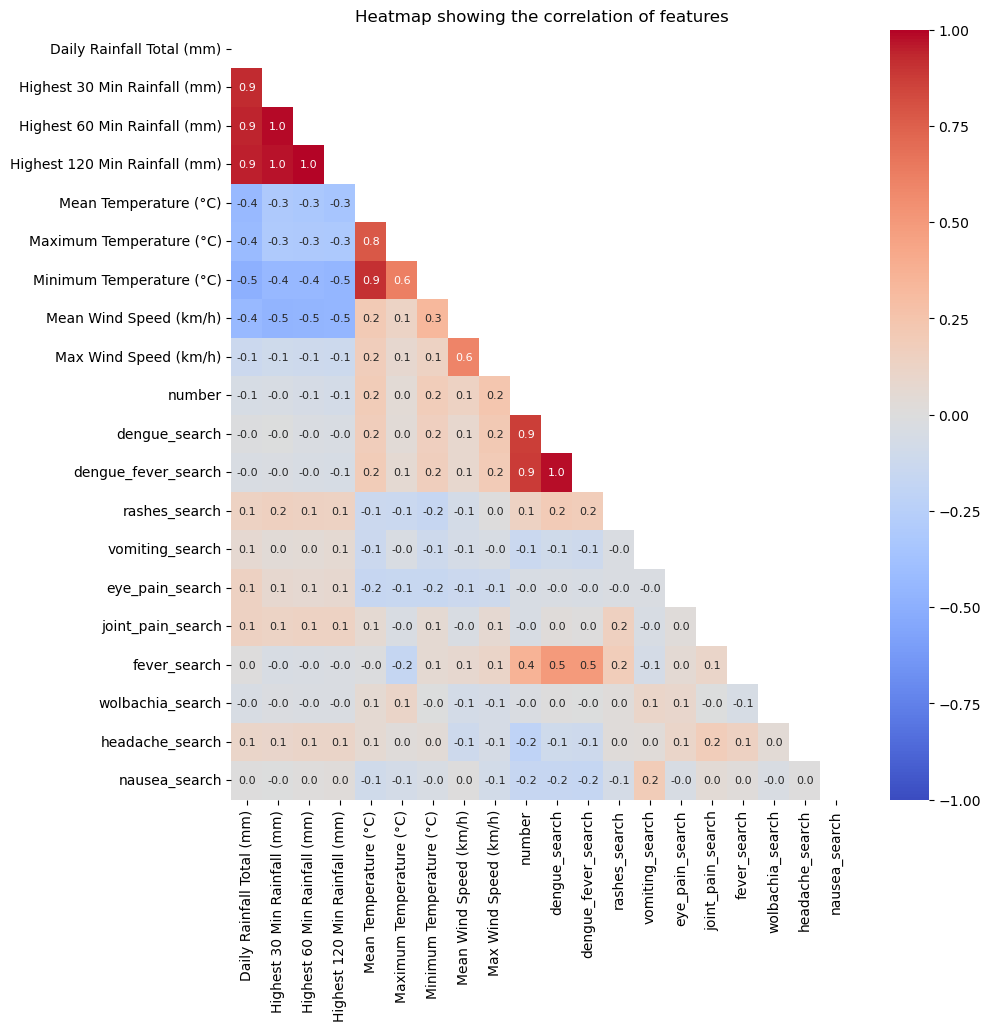

In [28]:
# plot a heatmap to look at the correlation matrix of the selected variables
# getting the Upper Triangle of the co-relation matrix
matrix = np.triu(df.corr())

# using the upper triangle matrix as mask 
plt.figure(figsize=(10,10))
plt.title("Heatmap showing the correlation of features")
sns.heatmap(df.corr(), annot=True, mask= matrix, cmap="coolwarm", 
           fmt=".1f", annot_kws={"size":8}, vmin=-1, vmax=1);

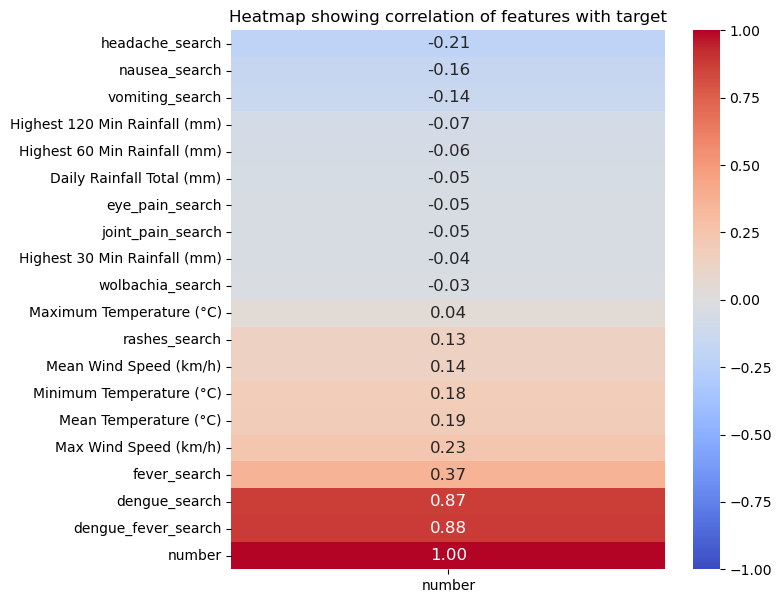

In [29]:
plt.figure(figsize=(7,7))
plt.title("Heatmap showing correlation of features with target")
sns.heatmap(df.corr()[["number"]].sort_values(by = 'number'), annot=True, cmap="coolwarm", 
           fmt=".2f", annot_kws={"size":12}, vmin=-1, vmax=1);

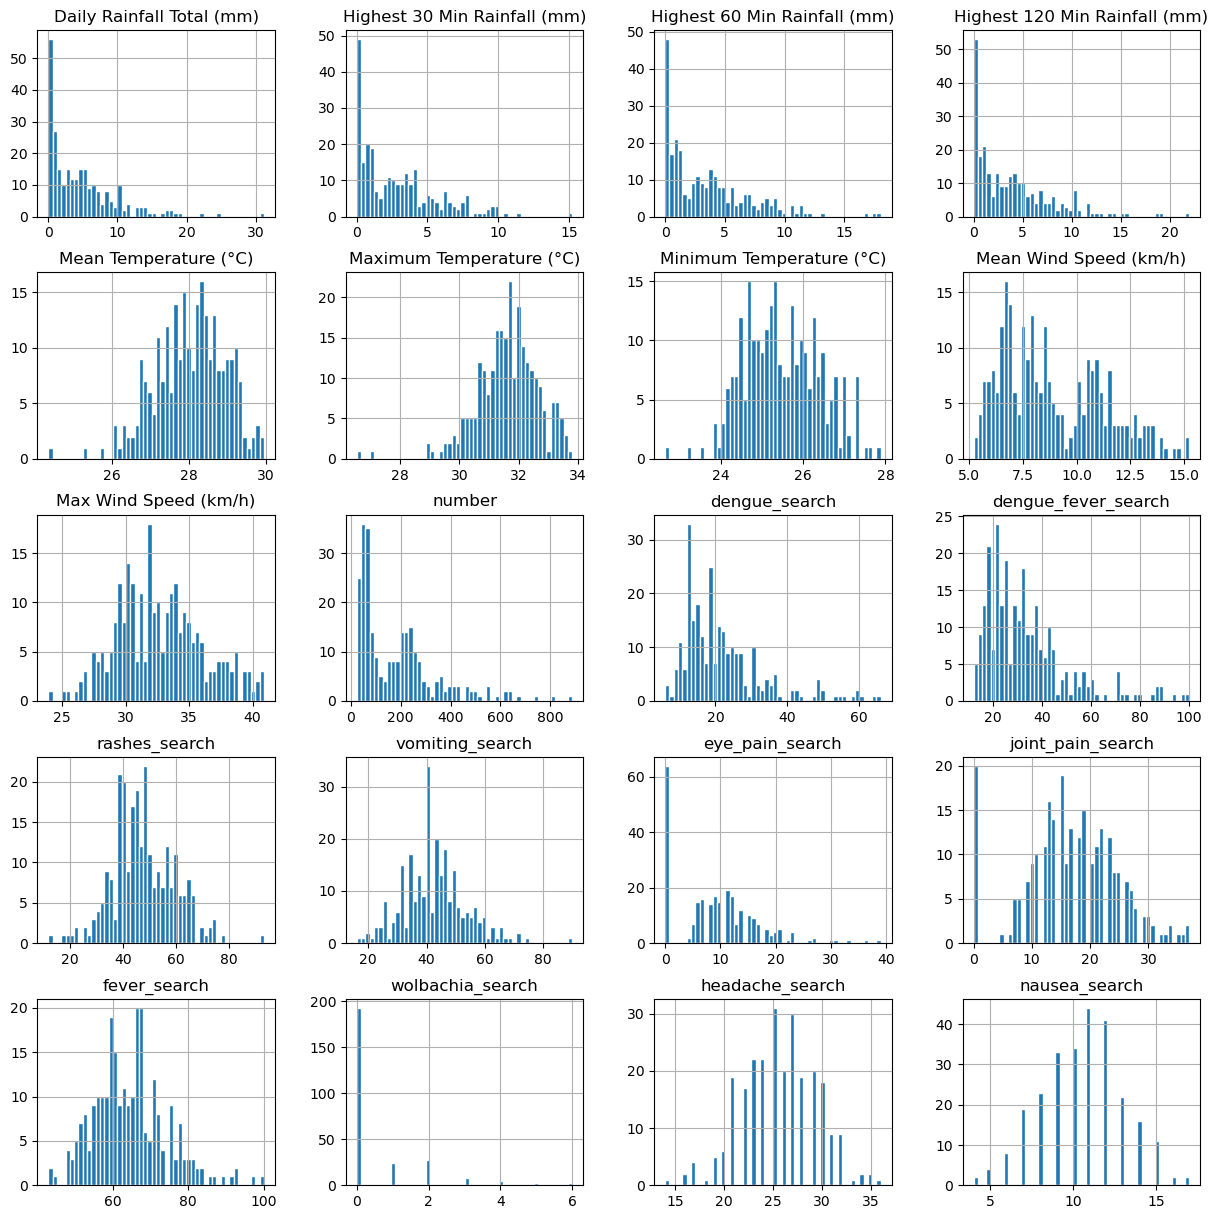

In [30]:
#visualizing distributions 
df.hist(bins=50, figsize=(15,15), ec='w')
plt.show()
#target-area-is heavily skewed, we have extreme outliers.

In [31]:
df.columns

Index(['Daily Rainfall Total (mm)', 'Highest 30 Min Rainfall (mm)',
       'Highest 60 Min Rainfall (mm)', 'Highest 120 Min Rainfall (mm)',
       'Mean Temperature (°C)', 'Maximum Temperature (°C)',
       'Minimum Temperature (°C)', 'Mean Wind Speed (km/h)',
       'Max Wind Speed (km/h)', 'number', 'dengue_search',
       'dengue_fever_search', 'rashes_search', 'vomiting_search',
       'eye_pain_search', 'joint_pain_search', 'fever_search',
       'wolbachia_search', 'headache_search', 'nausea_search'],
      dtype='object')

In [32]:
df = df.reset_index()

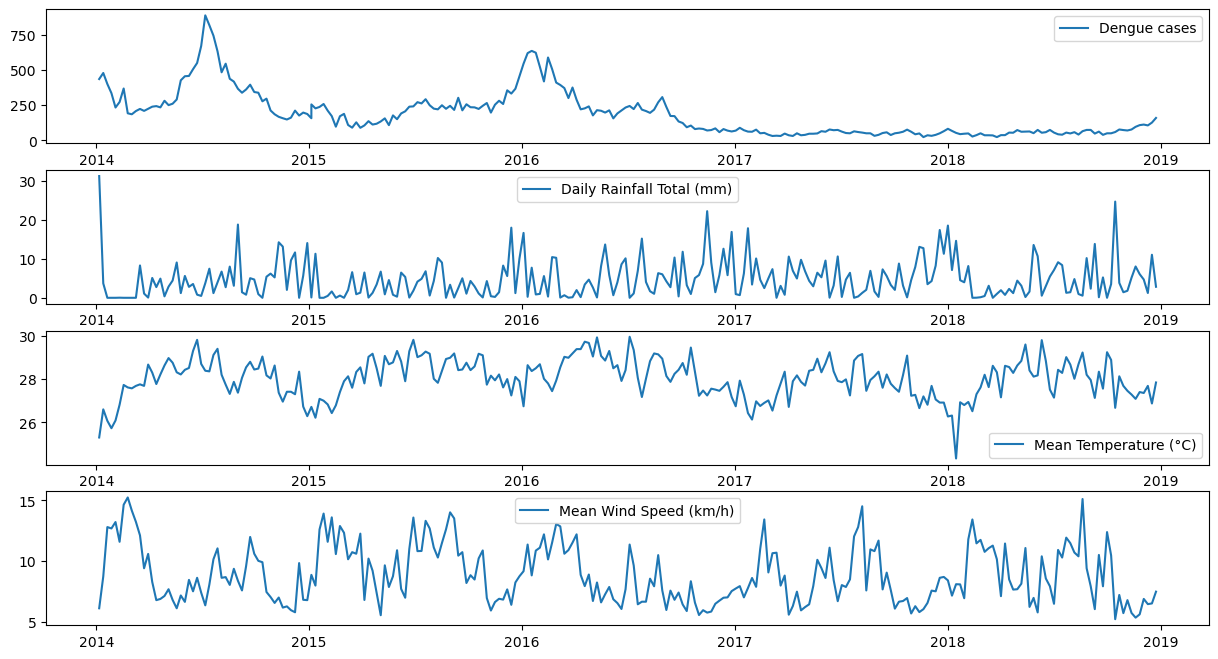

In [33]:
# Looking at chaneges over time for weather variables

fig, ax = plt.subplots(nrows=4, figsize=(15,8))

ax[0].plot(df['date'], df['number'], label='Dengue cases')
ax[1].plot(df['date'], df['Daily Rainfall Total (mm)'], label='Daily Rainfall Total (mm)')   
ax[2].plot(df['date'], df['Mean Temperature (°C)'], label='Mean Temperature (°C)')
ax[3].plot(df['date'], df['Mean Wind Speed (km/h)'], label='Mean Wind Speed (km/h)')

# Cosmetics & show
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()

plt.show()

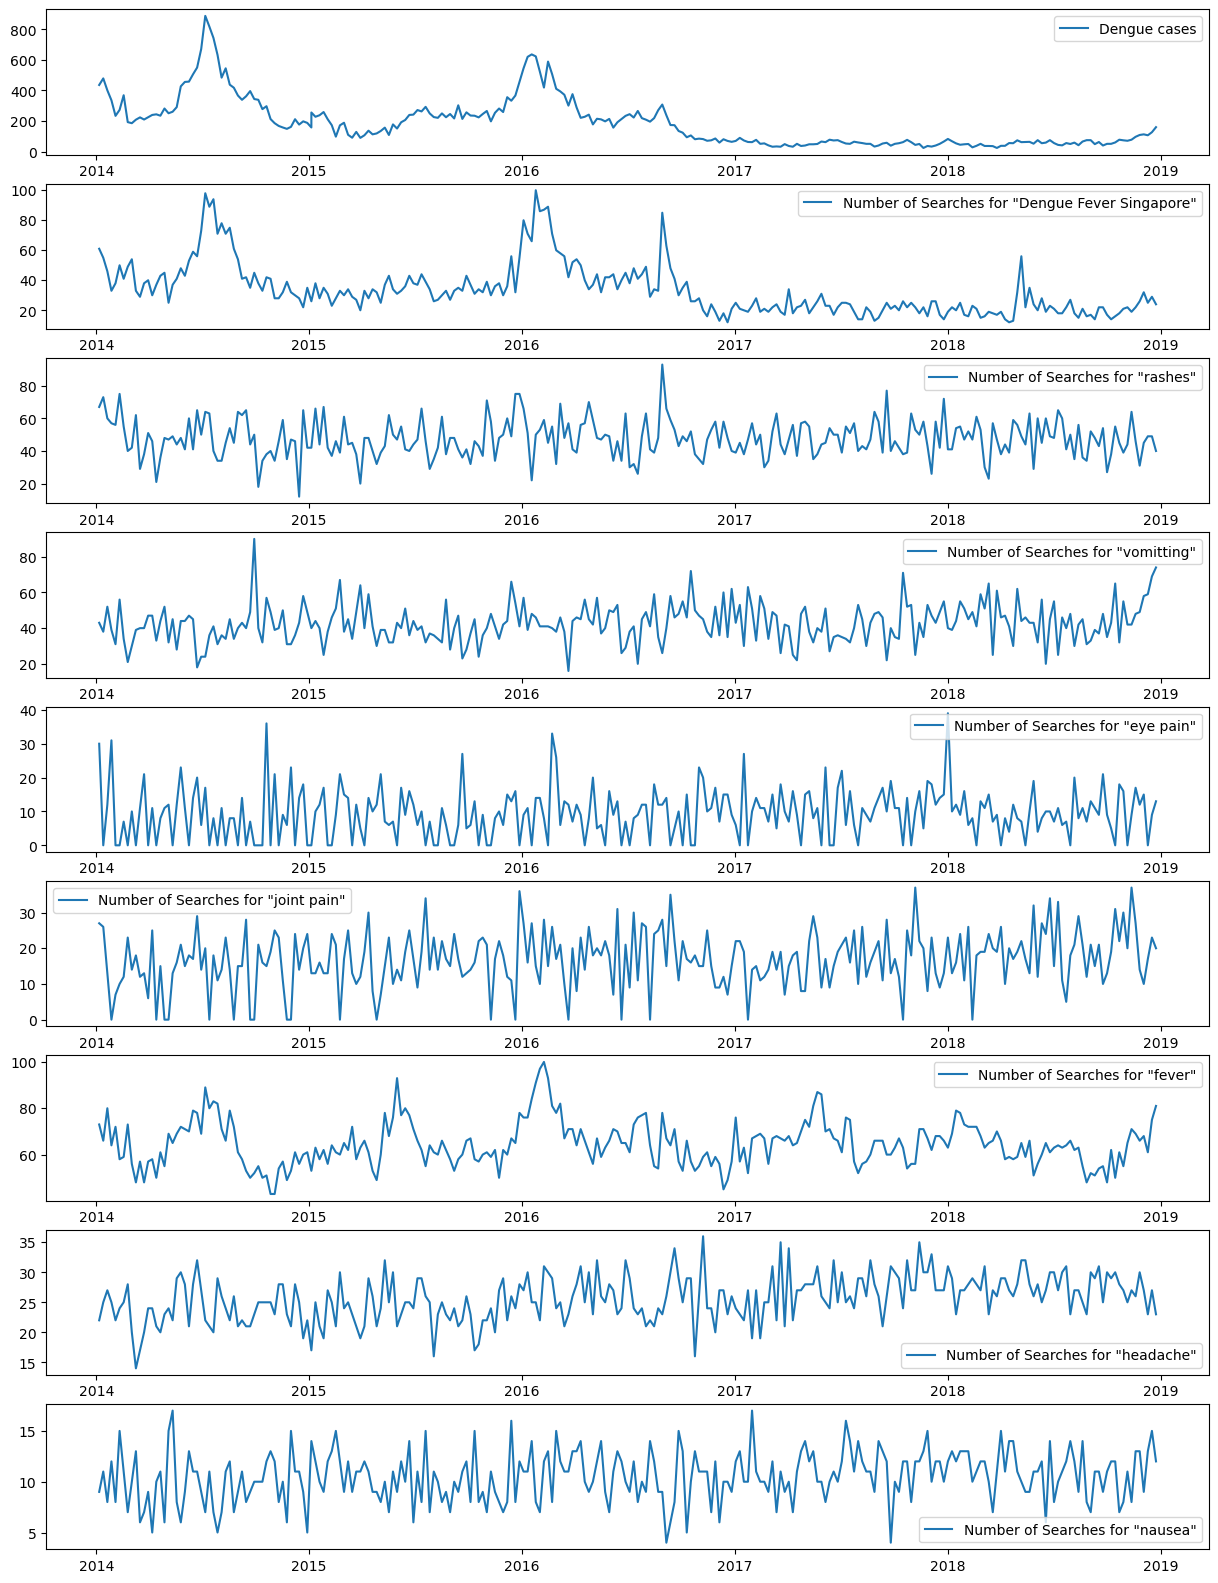

In [35]:
# Looking at changes over time for search-related variables

fig, ax = plt.subplots(nrows=9, figsize=(15,20))

ax[0].plot(df['date'], df['number'], label='Dengue cases')
ax[1].plot(df['date'], df['dengue_fever_search'], label='Number of Searches for "Dengue Fever Singapore"')   
ax[2].plot(df['date'], df['rashes_search'], label='Number of Searches for "rashes"')
ax[3].plot(df['date'], df['vomiting_search'], label='Number of Searches for "vomitting"')
ax[4].plot(df['date'], df['eye_pain_search'], label='Number of Searches for "eye pain"')
ax[5].plot(df['date'], df['joint_pain_search'], label='Number of Searches for "joint pain"')
ax[6].plot(df['date'], df['fever_search'], label='Number of Searches for "fever"')
ax[7].plot(df['date'], df['headache_search'], label='Number of Searches for "headache"')
ax[8].plot(df['date'], df['nausea_search'], label='Number of Searches for "nausea"')

# Cosmetics & show
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()
ax[5].legend()
ax[6].legend()
ax[7].legend()
ax[8].legend()

plt.show()

In [36]:
df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   date                           261 non-null    datetime64[ns]
 1   Daily Rainfall Total (mm)      261 non-null    float64       
 2   Highest 30 Min Rainfall (mm)   261 non-null    float64       
 3   Highest 60 Min Rainfall (mm)   261 non-null    float64       
 4   Highest 120 Min Rainfall (mm)  261 non-null    float64       
 5   Mean Temperature (°C)          261 non-null    float64       
 6   Maximum Temperature (°C)       261 non-null    float64       
 7   Minimum Temperature (°C)       261 non-null    float64       
 8   Mean Wind Speed (km/h)         261 non-null    float64       
 9   Max Wind Speed (km/h)          261 non-null    float64       
 10  number                         261 non-null    float64       
 11  dengue_search      

In [37]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month

In [38]:
# grouping case number by year and month

grouped_df = df.groupby(['year', 'month'])['number'].agg('mean')
grouped_df = pd.DataFrame(grouped_df)

In [39]:
# grouping temp by year and month

grouped_temp = df.groupby(['year', 'month'])['Mean Temperature (°C)'].agg('mean')
grouped_temp = pd.DataFrame(grouped_temp)

In [46]:
# grouping dengue fever search by year and month

grouped_dengue_fever = df.groupby(['year', 'month'])['dengue_fever_search'].agg('mean')
grouped_dengue_fever = pd.DataFrame(grouped_dengue_fever)

In [47]:
# generate a list of shortened month names
short_month_names = [calendar.month_abbr[i] for i in range(1, 13)]

# print the list
print(short_month_names)

['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


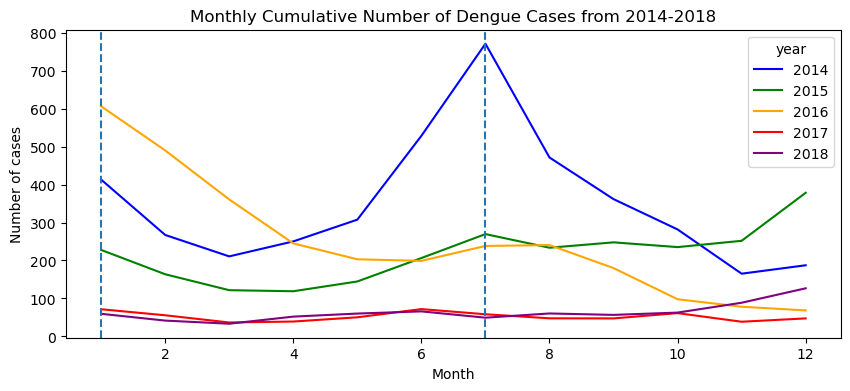

In [48]:
# Cumulative case number by year

plt.figure(figsize=(10, 4))
sns.lineplot(data=grouped_df, x="month", y="number", hue="year", palette=['blue', 'green', 'orange', 'red', 'purple'])
plt.title("Monthly Cumulative Number of Dengue Cases from 2014-2018")
plt.axvline(x = 7, linestyle = "--") 
plt.axvline(x = 1, linestyle = "--") 
plt.xlabel("Month")
plt.ylabel("Number of cases") 

plt.show()

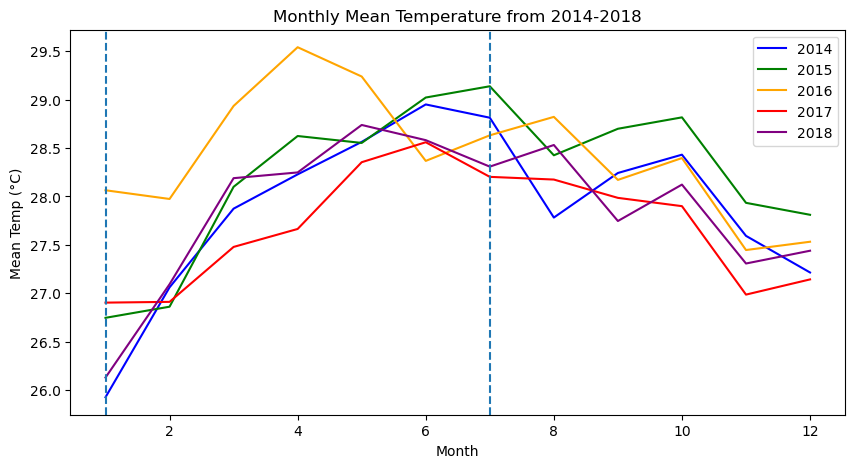

In [49]:
# Mean temp by year

plt.figure(figsize=(10, 5))
sns.lineplot(data=grouped_temp, x="month", y="Mean Temperature (°C)", hue="year", palette=['blue', 'green', 'orange', 'red', 'purple'])
plt.title("Monthly Mean Temperature from 2014-2018")
plt.axvline(x = 7, linestyle = "--") 
plt.axvline(x = 1, linestyle = "--") 
plt.xlabel("Month")
plt.ylabel("Mean Temp (°C)") 
plt.legend(loc='upper right')

plt.show()

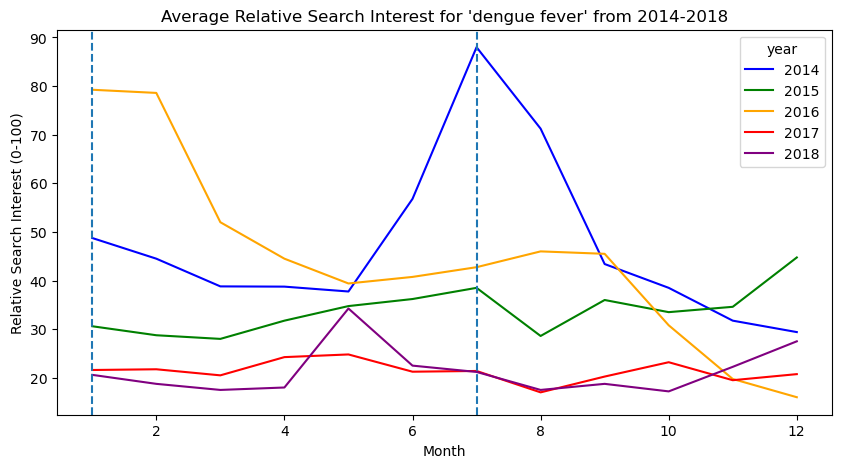

In [51]:
# Average 'dengue fever' searches by year

plt.figure(figsize=(10, 5))
sns.lineplot(data=grouped_dengue_fever, x="month", y="dengue_fever_search", hue="year", palette=['blue', 'green', 'orange', 'red', 'purple'])
plt.title("Average Relative Search Interest for 'dengue fever' from 2014-2018")
plt.axvline(x = 7, linestyle = "--") 
plt.axvline(x = 1, linestyle = "--") 
plt.xlabel("Month")
plt.ylabel("Relative Search Interest (0-100)") 

plt.show()

In [52]:
# Checking linearity of relationship

#sns.pairplot(df)

In [53]:
time_df = df[['year', 'month', 'number']]
time_df.head()

,year,month,number
0,2014,1,436.0
1,2014,1,479.0
2,2014,1,401.0
3,2014,1,336.0
4,2014,2,234.0


In [54]:
grouped_time_df = pd.DataFrame.pivot_table(time_df, values='number', index='year',
                                           columns='month', aggfunc=np.mean)
grouped_time_df

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2014,413.0,267.25,210.80,250.25,307.50,528.2,770.75,471.25,361.60,281.75,165.25,187.40
2015,227.8,163.75,121.80,119.00,144.75,206.4,269.50,233.60,247.75,235.25,251.80,378.25
2016,606.0,489.80,360.75,245.00,203.20,199.0,238.25,240.60,180.00,98.00,78.25,68.50
2017,71.6,55.75,36.75,39.25,50.40,72.0,58.40,47.75,47.50,61.40,38.75,47.50
2018,59.6,41.75,33.50,52.20,60.25,66.0,49.40,60.50,56.75,62.80,88.75,126.75


Text(0.5, 1.0, 'Comparison of Mean Dengue Cases by Month (2014-2018)')

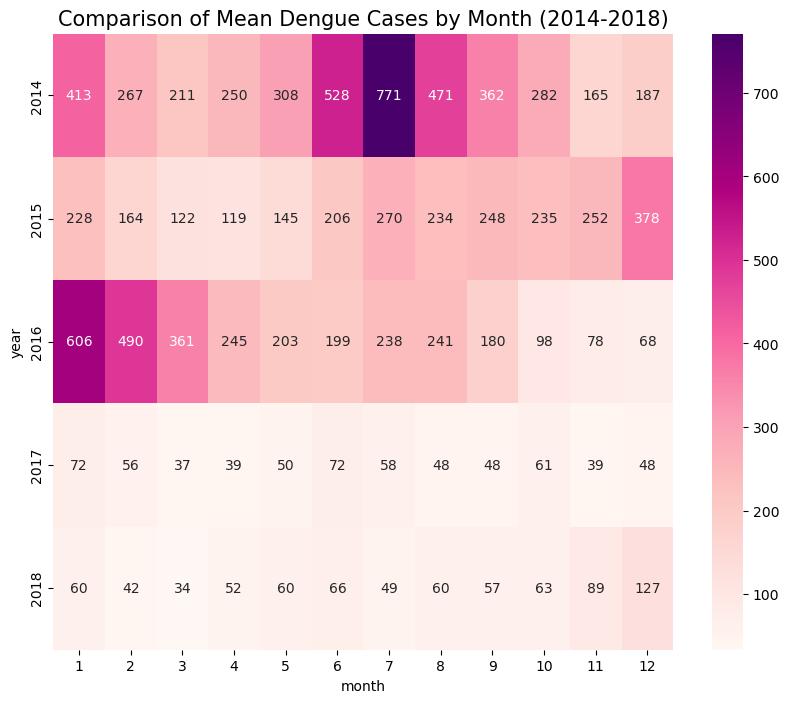

In [55]:
# Looking at cases over years and months

fig, ax = plt.subplots(figsize=(10,8))  

sns.heatmap(grouped_time_df,
            annot=True,
            fmt='.0f',
            cmap="RdPu")

ax.set_title('Comparison of Mean Dengue Cases by Month (2014-2018)', fontsize =15)


## Feature Engineering

In [56]:
df = df.reset_index()
df.head()

,index,date,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),...,rashes_search,vomiting_search,eye_pain_search,joint_pain_search,fever_search,wolbachia_search,headache_search,nausea_search,year,month
0,0,2014-01-06,31.200000,10.000000,10.800000,11.600000,25.300000,27.100000,23.900000,6.100000,...,67,43,30,27,73,0,22,9,2014,1
1,1,2014-01-13,3.685714,3.628571,3.685714,3.685714,26.600000,30.428571,24.342857,8.728571,...,73,38,0,26,66,2,25,11,2014,1
2,2,2014-01-20,0.000000,0.000000,0.000000,0.000000,26.071429,28.971429,24.057143,12.800000,...,60,52,12,13,80,0,27,8,2014,1
3,3,2014-01-27,0.000000,0.000000,0.000000,0.000000,25.728571,29.142857,23.557143,12.685714,...,57,39,31,0,64,0,25,12,2014,1
4,4,2014-02-03,0.000000,0.000000,0.000000,0.000000,26.085714,30.685714,23.214286,13.214286,...,56,31,0,7,72,0,22,8,2014,2


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   index                          261 non-null    int64         
 1   date                           261 non-null    datetime64[ns]
 2   Daily Rainfall Total (mm)      261 non-null    float64       
 3   Highest 30 Min Rainfall (mm)   261 non-null    float64       
 4   Highest 60 Min Rainfall (mm)   261 non-null    float64       
 5   Highest 120 Min Rainfall (mm)  261 non-null    float64       
 6   Mean Temperature (°C)          261 non-null    float64       
 7   Maximum Temperature (°C)       261 non-null    float64       
 8   Minimum Temperature (°C)       261 non-null    float64       
 9   Mean Wind Speed (km/h)         261 non-null    float64       
 10  Max Wind Speed (km/h)          261 non-null    float64       
 11  number             

In [58]:
df.head()

,index,date,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),...,rashes_search,vomiting_search,eye_pain_search,joint_pain_search,fever_search,wolbachia_search,headache_search,nausea_search,year,month
0,0,2014-01-06,31.200000,10.000000,10.800000,11.600000,25.300000,27.100000,23.900000,6.100000,...,67,43,30,27,73,0,22,9,2014,1
1,1,2014-01-13,3.685714,3.628571,3.685714,3.685714,26.600000,30.428571,24.342857,8.728571,...,73,38,0,26,66,2,25,11,2014,1
2,2,2014-01-20,0.000000,0.000000,0.000000,0.000000,26.071429,28.971429,24.057143,12.800000,...,60,52,12,13,80,0,27,8,2014,1
3,3,2014-01-27,0.000000,0.000000,0.000000,0.000000,25.728571,29.142857,23.557143,12.685714,...,57,39,31,0,64,0,25,12,2014,1
4,4,2014-02-03,0.000000,0.000000,0.000000,0.000000,26.085714,30.685714,23.214286,13.214286,...,56,31,0,7,72,0,22,8,2014,2


In [59]:
# creating month and year columns

df['year'] = df.date.dt.year
df['month'] = df.date.dt.month

In [60]:
# log transformation  

df['number_log'] = np.log(df['number'])

In [61]:
df.columns

Index(['index', 'date', 'Daily Rainfall Total (mm)',
       'Highest 30 Min Rainfall (mm)', 'Highest 60 Min Rainfall (mm)',
       'Highest 120 Min Rainfall (mm)', 'Mean Temperature (°C)',
       'Maximum Temperature (°C)', 'Minimum Temperature (°C)',
       'Mean Wind Speed (km/h)', 'Max Wind Speed (km/h)', 'number',
       'dengue_search', 'dengue_fever_search', 'rashes_search',
       'vomiting_search', 'eye_pain_search', 'joint_pain_search',
       'fever_search', 'wolbachia_search', 'headache_search', 'nausea_search',
       'year', 'month', 'number_log'],
      dtype='object')

In [63]:
# Since one of OLS' assumptions is no multicollinearity, we will perform the following feature selection:
#- For rainfall, take "Daily Rainfall Total (mm)" and drop the rest
#- For temperature, take "Mean Temperature (°C)" and drop the rest
#- For wind, take "Mean Wind Speed (km/h")
# - Taking dengue fever and dropping dengue 
# - Additionally, dropping 'Wolbachia' due to sparse data

df = df[['Daily Rainfall Total (mm)',
          'Mean Temperature (°C)', 
          'Mean Wind Speed (km/h)',
          'dengue_fever_search', 'rashes_search', 'vomiting_search',
          'eye_pain_search', 'joint_pain_search', 'fever_search',
          'headache_search', 'nausea_search', 'year', 'month',
          'number_log']]


## Modeling

### 1. Simple OLS

In [64]:
#one-hot encode year and month

df = pd.get_dummies(df,
                    columns=['year', 'month'],
                    drop_first=True)

In [65]:
y = df['number_log']
X = df.drop(columns = 'number_log')

In [66]:
X.columns

Index(['Daily Rainfall Total (mm)', 'Mean Temperature (°C)',
       'Mean Wind Speed (km/h)', 'dengue_fever_search', 'rashes_search',
       'vomiting_search', 'eye_pain_search', 'joint_pain_search',
       'fever_search', 'headache_search', 'nausea_search', 'year_2015',
       'year_2016', 'year_2017', 'year_2018', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12'],
      dtype='object')

### Train test split and modeling

In [67]:
# Create train/test splits.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.75,
    random_state=42
)

In [68]:
# Scale our data.
# Relabeling scaled data as "Z" is common.

sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [69]:
print(f'Z_train shape is: {Z_train.shape}')
print(f'y_train shape is: {y_train.shape}')
print(f'Z_test shape is: {Z_test.shape}')
print(f'y_test shape is: {y_test.shape}')

Z_train shape is: (65, 26)
y_train shape is: (65,)
Z_test shape is: (196, 26)
y_test shape is: (196,)


In [70]:
# Step 1. Instantiate the model.
lr = LinearRegression()

# Step 2. Fit the model on the training data.
lr.fit(Z_train, y_train)

# Step 3. Generate predictions.
preds = lr.predict(Z_test)

In [71]:
# Check the MSE on the training and testing sets.

print(f'MSE on testing set: {mean_squared_error(y_train, lr.predict(Z_train))}')
print(f'MSE on training set: {mean_squared_error(y_test, preds)}')

MSE on testing set: 0.06335873970155598
MSE on training set: 0.14951505378596505


In [72]:
# Cross-validation

lr_scores = cross_val_score(lr, Z_train, y_train, cv=5)
print('Cross-validation scores:', lr_scores)
print('Mean score:', lr_scores.mean())

Cross-validation scores: [0.6356501  0.58750985 0.66063858 0.52991815 0.65220754]
Mean score: 0.6131848446016835


Some overfitting is observed

In [73]:
# Check the R^2 on the training and testing sets 

print(f'R^2 on testing set: {r2_score(y_train, lr.predict(Z_train))}')
print(f'R^2 on training set: {r2_score(y_test, preds)}')

R^2 on testing set: 0.9139914334028125
R^2 on training set: 0.7958968481260718


In [74]:
pd.DataFrame({
    'features' : X.columns,
    'coefficients' : lr.coef_,
    'converted_coefficients': (np.exp(lr.coef_)-1)*100,
})

,features,coefficients,converted_coefficients
0,Daily Rainfall Total (mm),-0.028875,-2.846218
1,Mean Temperature (°C),0.283891,32.828860
2,Mean Wind Speed (km/h),-0.169666,-15.605350
3,dengue_fever_search,0.302485,35.321794
4,rashes_search,-0.043181,-4.226172
5,vomiting_search,0.029931,3.038329
6,eye_pain_search,0.053606,5.506916
7,joint_pain_search,-0.010600,-1.054416
8,fever_search,-0.013858,-1.376223
9,headache_search,0.015577,1.569928


In [75]:
# observing coefficients' p-values using statsmodels

X_sm = sm.add_constant(X)
ols = sm.OLS(y, X_sm).fit()


In [76]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             number_log   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     76.63
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           2.37e-99
Time:                        18:43:38   Log-Likelihood:                -36.490
No. Observations:                 261   AIC:                             127.0
Df Residuals:                     234   BIC:                             223.2
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.6206      1.104      0.562      0.574      -1.554       2.795
Daily Rainfall Total (mm)     0.0036      0.005      0.751      0.453      -0.006       0.013
Mean Temperature (°C)         0.1591      0.042      3.831      0.000       0.077       0.241
Mean Wind Speed (km/h)        0.0016      0.013      0.117      0.907      -0.025       0.028
dengue_fever_search           0.0213      0.002     10.448      0.000       0.017       0.025
rashes_search                 0.0005      0.002      0.282      0.778      -0.003       0.004
vomiting_search              -0.0003      0.002     -0.149      0.882      -0.004       0.003
eye_pain_search               0.0017      0.003      0.665      0.507      -0.003       0.007
joint_pain_search             0.0008      0.003      0.332      0.740      -0.004       0.006
fever_search                  0.0014      0.003      0.482      0.631      -0.004       0.007
headache_search              -0.0077      0.006     -1.350      0.178      -0.019       0.004
nausea_search                 0.0097      0.008      1.237      0.217      -0.006       0.025
year_2015                    -0.2129      0.065     -3.252      0.001      -0.342      -0.084
year_2016                    -0.4697      0.070     -6.732      0.000      -0.607      -0.332
year_2017                    -1.2490      0.085    -14.683      0.000      -1.417      -1.081
year_2018                    -1.1194      0.084    -13.308      0.000      -1.285      -0.954
month_2                      -0.3186      0.095     -3.341      0.001      -0.506      -0.131
month_3                      -0.6107      0.100     -6.108      0.000      -0.808      -0.414
month_4                      -0.5790      0.120     -4.840      0.000      -0.815      -0.343
month_5                      -0.5543      0.129     -4.302      0.000      -0.808      -0.300
month_6                      -0.3442      0.125     -2.753      0.006      -0.591      -0.098
month_7                      -0.4045      0.112     -3.614      0.000      -0.625      -0.184
month_8                      -0.3470      0.106     -3.276      0.001      -0.556      -0.138
month_9                      -0.3481      0.110     -3.173      0.002      -0.564      -0.132
month_10                     -0.3984      0.118     -3.376      0.001      -0.631      -0.166
month_11                     -0.3526      0.114     -3.088      0.002      -0.578      -0.128
month_12                     -0.2431      0.106     -2.284      0.023      -0.453      -0.033
==============================================================================
Omnibus:                        2.765   Durbin-Watson:                   1.074
Prob(Omnibus):                  0.251   Jarque-Bera (JB):                2.823
Skew:                     

Text(0.5, 1.0, 'OLS Regression Predictions vs Actual Dengue Cases')

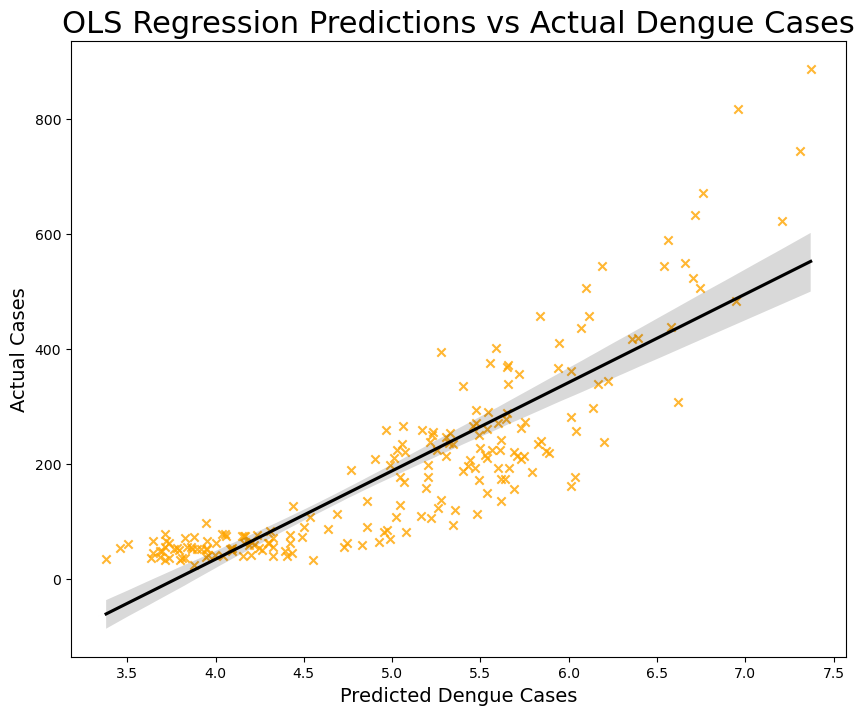

In [77]:
# Create scatterplot to show predicted values versus actual values (not logged)

plt.figure(figsize=(10,8))
sns.regplot(data=Z_train, x=preds, y=np.exp(y_test), 
            marker='x', color='orange', line_kws={'color':'black'})
plt.xlabel('Predicted Dengue Cases', fontsize=14)
plt.ylabel('Actual Cases', fontsize=14)
plt.title('OLS Regression Predictions vs Actual Dengue Cases', fontsize=22)

### Conclusions from OLS

- A linear regression model is probably not the best one to use for predicting dengue cases looking at the residual plot and the cross-validation scores (there is some overfitting)
- Rainfall and wind speed are not significant predictors of dengue cases

**Interpretations for coefficients with p-value < 0.05:**
- For every one-unit increase in the mean temperature, number of dengue cases increases by 8%.
- For every one-unit increase in the searches for 'dengue fever', number of dengue cases increases by 34% 
- Compared to all other months, Jan is associated with higher number of cases 
- 2014 is also associated with more cases than 2015-2018.  

For reference on interpreting log-transformed variables: 
https://data.library.virginia.edu/interpreting-log-transformations-in-a-linear-model/

### Checking other assumptions

Independence and linearity were checked during EDA.

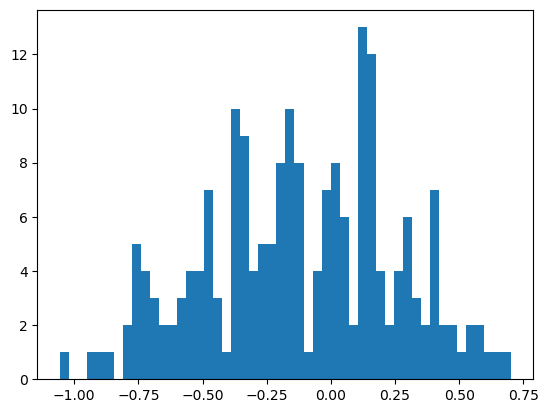

In [78]:
### Normality of error terms

resids = y_test - preds
plt.hist(resids, bins=50);

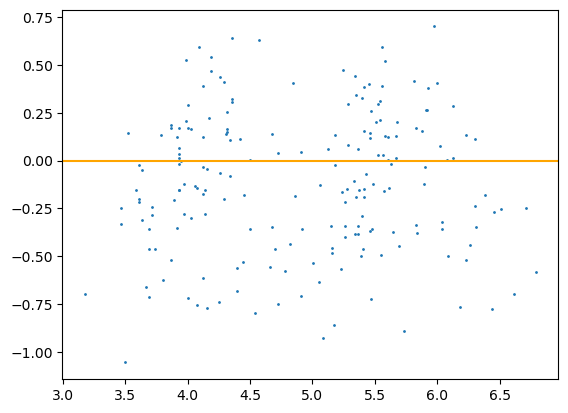

In [79]:
###  Homoscedasticity 
plt.scatter(y_test, resids, s=1)
plt.axhline(0, color="orange");

### 2. Poisson Regression
Without any log transformation

In [80]:
# Set up X.
X_p = sm.add_constant(X)

# Set up y.
y = combined['number']

In [81]:
# Checking if the predicts are correct

X_p.columns

Index(['const', 'Daily Rainfall Total (mm)', 'Mean Temperature (°C)',
       'Mean Wind Speed (km/h)', 'dengue_fever_search', 'rashes_search',
       'vomiting_search', 'eye_pain_search', 'joint_pain_search',
       'fever_search', 'headache_search', 'nausea_search', 'year_2015',
       'year_2016', 'year_2017', 'year_2018', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12'],
      dtype='object')

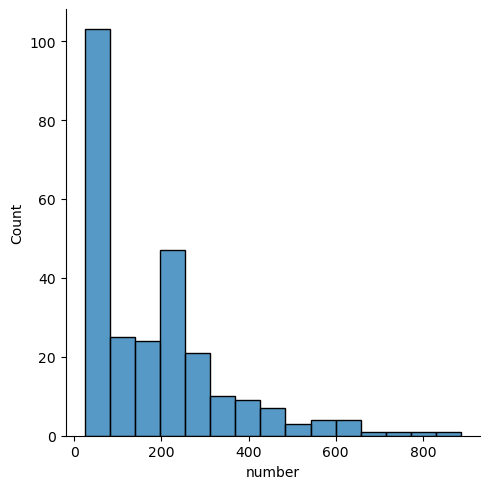

In [82]:
# For y variables that are heavy on the left, Poisson and Gamma regressions are good

sns.displot(y)

In [83]:
# Fit Poisson regression model

glm_poi = sm.GLM(
    y,X_p,
    family=sm.families.Poisson(link = sm.families.links.log())
).fit()


In [84]:
glm_poi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 number   No. Observations:                  261
Model:                            GLM   Df Residuals:                      234
Model Family:                 Poisson   Df Model:                           26
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2389.6
Date:                Wed, 26 Apr 2023   Deviance:                       3026.2
Time:                        18:43:41   Pearson chi2:                 3.00e+03
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.3635      0.277      1.311      0.190      -0.180       0.907
Daily Rainfall Total (mm)     0.0042      0.001      3.549      0.000       0.002       0.007
Mean Temperature (°C)         0.1640      0.011     15.377      0.000       0.143       0.185
Mean Wind Speed (km/h)        0.0067      0.003      1.940      0.052   -6.97e-05       0.013
dengue_fever_search           0.0173      0.000     37.478      0.000       0.016       0.018
rashes_search                 0.0011      0.000      2.905      0.004       0.000       0.002
vomiting_search              -0.0008      0.000     -1.699      0.089      -0.002       0.000
eye_pain_search               0.0012      0.001      1.940      0.052   -1.21e-05       0.002
joint_pain_search            -0.0004      0.001     -0.715      0.475      -0.002       0.001
fever_search                  0.0031      0.001      4.228      0.000       0.002       0.005
headache_search              -0.0004      0.001     -0.263      0.793      -0.003       0.002
nausea_search                 0.0121      0.002      6.275      0.000       0.008       0.016
year_2015                    -0.2517      0.015    -17.247      0.000      -0.280      -0.223
year_2016                    -0.4446      0.016    -28.669      0.000      -0.475      -0.414
year_2017                    -1.3700      0.025    -54.067      0.000      -1.420      -1.320
year_2018                    -1.2117      0.024    -50.952      0.000      -1.258      -1.165
month_2                      -0.3157      0.021    -14.783      0.000      -0.358      -0.274
month_3                      -0.5239      0.025    -20.696      0.000      -0.573      -0.474
month_4                      -0.5965      0.033    -18.253      0.000      -0.661      -0.532
month_5                      -0.5744      0.034    -16.706      0.000      -0.642      -0.507
month_6                      -0.3963      0.032    -12.496      0.000      -0.458      -0.334
month_7                      -0.4118      0.027    -15.103      0.000      -0.465      -0.358
month_8                      -0.4000      0.025    -16.185      0.000      -0.448      -0.352
month_9                      -0.3469      0.028    -12.333      0.000      -0.402      -0.292
month_10                     -0.4621      0.032    -14.449      0.000      -0.525      -0.399
month_11                     -0.3912      0.032    -12.049      0.000      -0.455      -0.328
month_12                     -0.2449      0.028     -8.684      0.000      -0.300      -0.190
=============================================================================================
"""

In [85]:
# Table for coefficient interpreting

results = pd.DataFrame({
    'coefficients': glm_poi.params,
    'converted_coefficients': np.exp(glm_poi.params),
    'p_values': round(glm_poi.pvalues,5)
})

In [86]:
results[results['p_values']< 0.05]

,coefficients,converted_coefficients,p_values
Daily Rainfall Total (mm),0.004202,1.004211,0.00039
Mean Temperature (°C),0.164001,1.178215,0.00000
dengue_fever_search,0.017254,1.017404,0.00000
rashes_search,0.001144,1.001144,0.00367
fever_search,0.003118,1.003123,0.00002
nausea_search,0.012128,1.012201,0.00000
year_2015,-0.251721,0.777461,0.00000
year_2016,-0.444618,0.641069,0.00000
year_2017,-1.370004,0.254106,0.00000
year_2018,-1.211704,0.297690,0.00000


Conclusions from Poisson regression (directionality of results is mostly consistent with OLS):
- Consistent with OLS, rainfall is not a significant predictor of dengue cases
- All else held equal, for a one-unit increase in temperature, we can expect 1.2 times as many dengue cases. For a one unit increase in wind speed, there are 2% fewer cases. 
- More Google Search terms were statistically significant compared to OLS: dengue fever, rashes, fever, nausea. For a one-unit increase in 'Dengue Fever' searches, there were 1.1 times as many dengue cases.
- Similar to OLS, there were fewer cases for all years compared to 2014, holding all else constant. 
- Jan is associated with the highest number of cases, followed by Feb and Sep